In [2]:
import quandl

In [30]:
df= quandl.get("BSE/BOM539397")

In [3]:
df.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2018-02-26,11.62,11.62,11.62,11.62,11.62,5000000.0,9.0,58100000.0,5000000.0,100.00,0.00,0.00
2018-11-20,12.78,12.78,10.46,10.46,10.69,100.0,3.0,1069.0,100.0,100.00,2.32,-2.32
2018-11-21,9.42,9.42,9.42,9.42,9.42,100.0,1.0,942.0,100.0,100.00,0.00,0.00
2018-11-22,8.50,8.50,8.50,8.50,8.50,100.0,1.0,850.0,100.0,100.00,0.00,0.00
2018-11-26,8.03,8.50,8.01,8.50,8.05,104700.0,18.0,842452.0,99700.0,95.22,0.49,0.47


In [4]:
df = df[['Close','High','Low']]

In [5]:
df.head()

,Close,High,Low
Date,,,
1992-09-07,3.00,3.00,2.75
1992-09-18,3.00,3.00,3.00
1992-09-22,2.75,2.75,2.75
1992-09-24,2.75,2.75,2.75
1992-09-28,3.00,3.00,3.00


In [27]:
df= quandl.get("BSE/BOM512070")

In [8]:
len(df)

5691

In [9]:
dataset=df.values

In [10]:
dataset=dataset.astype('float32')

In [45]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = df[0:train_size], df[train_size:len(dataset)]
print(len(train), len(test))

3812 1879


In [12]:
df[0:10]

,Open
Date,
1992-09-07,2.75
1992-09-18,3.00
1992-09-22,2.75
1992-09-24,2.75
1992-09-28,3.00
1992-09-29,2.75
1992-09-30,3.00
1992-10-08,5.50
1992-10-12,7.00


In [13]:
import matplotlib.pyplot as plt 

In [14]:
df = df.to_frame()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

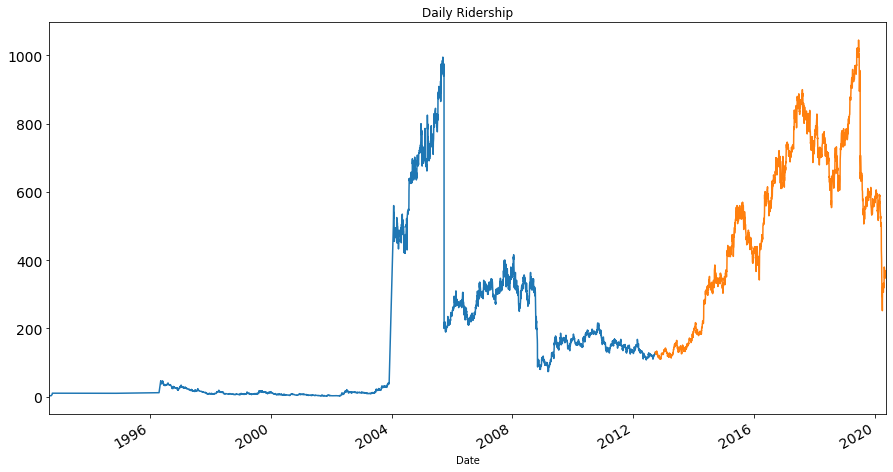

In [15]:
train.Open.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Open.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

In [16]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


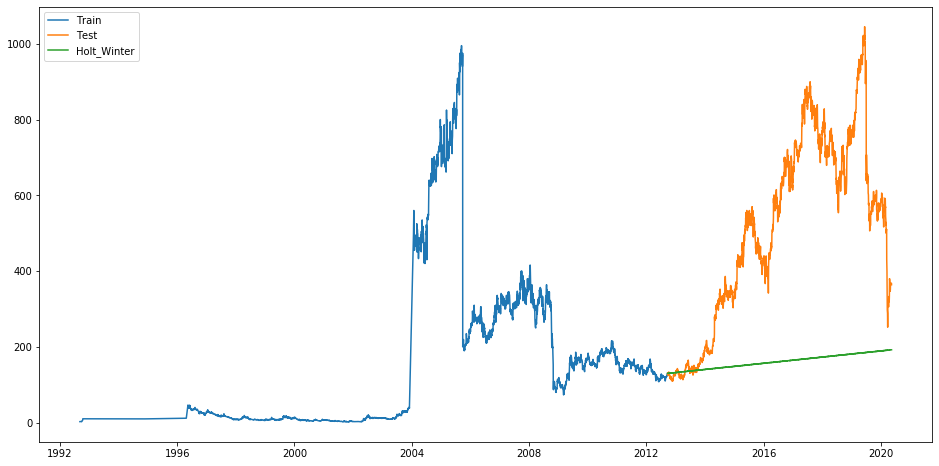

In [19]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Open']) ,seasonal_periods=4 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Open'], label='Train')
plt.plot(test['Open'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [20]:
rms = sqrt(mean_squared_error(test.Open, y_hat_avg.Holt_Winter))
print(rms)

417.44607443989094


In [159]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Open'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Open'], label='Train')
plt.plot(test['Open'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [23]:
rms = sqrt(mean_squared_error(test.Open, y_hat_avg.Holt_Winter))
print(rms)

417.53836537781734


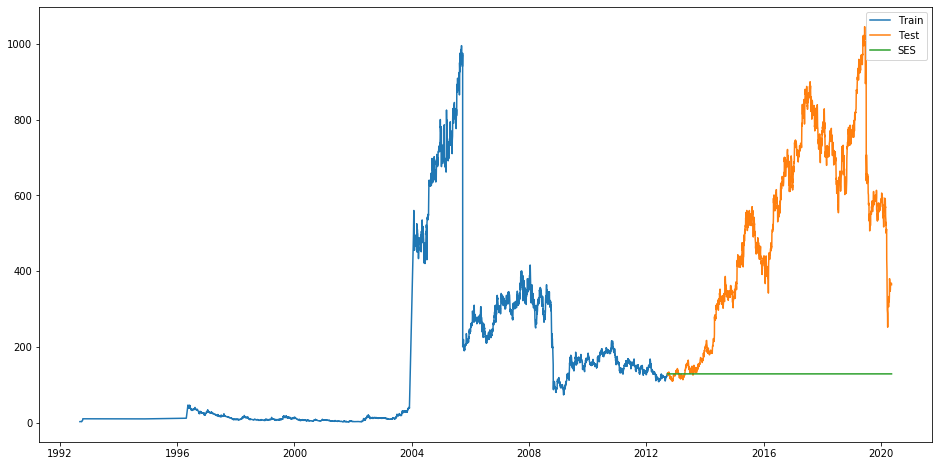

In [21]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Open'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Open'], label='Train')
plt.plot(test['Open'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

model = VARMAX(data, order=(1, 1))

In [23]:
rms = sqrt(mean_squared_error(test.Open, y_hat_avg.SES))
print(rms)

452.2632625212679


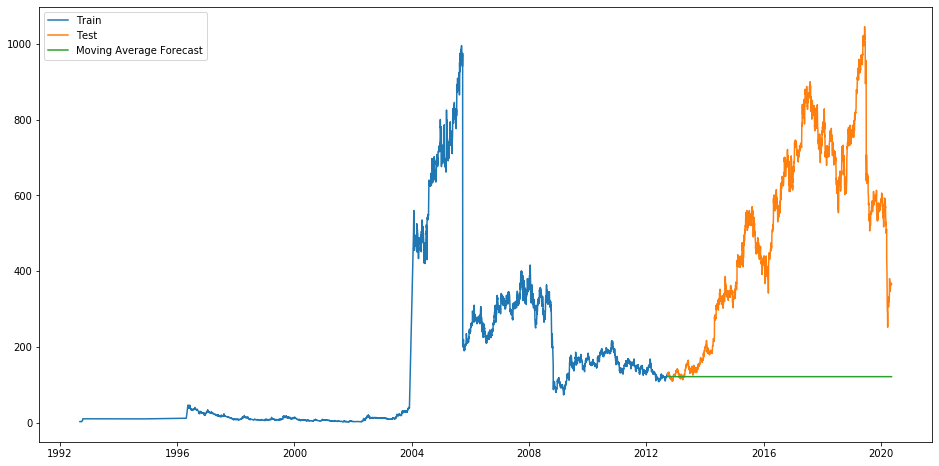

In [24]:
 y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Open'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Open'], label='Train')
plt.plot(test['Open'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [25]:
rms = sqrt(mean_squared_error(test.Open, y_hat_avg.moving_avg_forecast))
print(rms)

458.41809810154984


In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [48]:
train.head()

,Close,High,Low
Date,,,
1992-09-07,3.00,3.00,2.75
1992-09-18,3.00,3.00,3.00
1992-09-22,2.75,2.75,2.75
1992-09-24,2.75,2.75,2.75
1992-09-28,3.00,3.00,3.00


In [6]:
endog = df

In [7]:
exog = df['Close']

In [10]:
mod = sm.tsa.VARMAX(endog[['High', 'Low']], exog=exog)
res = mod.fit( )
print(res.summary())

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:        ['High', 'Low']   No. Observations:                 5691
Model:                        VARX(1)   Log Likelihood              -35496.836
                          + intercept   AIC                          71015.672
Date:                Thu, 14 May 2020   BIC                          71088.785
Time:                        12:03:04   HQIC                         71041.130
Sample:                             0                                         
                               - 5691                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):              366.66, 463.95   Jarque-Bera (JB):   295260.37, 803065.22
Prob(Q):                        0.00, 0.00   Prob(JB):                     0.00, 0.00
Heteroskedasticity (H):         3.72, 2.08   Skew:                        2.41, -5.25
Prob(H) (two-sided):           

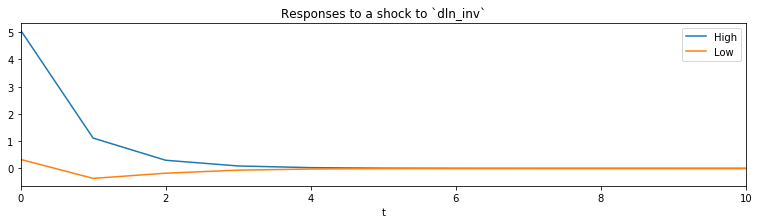

In [17]:
ax = res.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `dln_inv`');

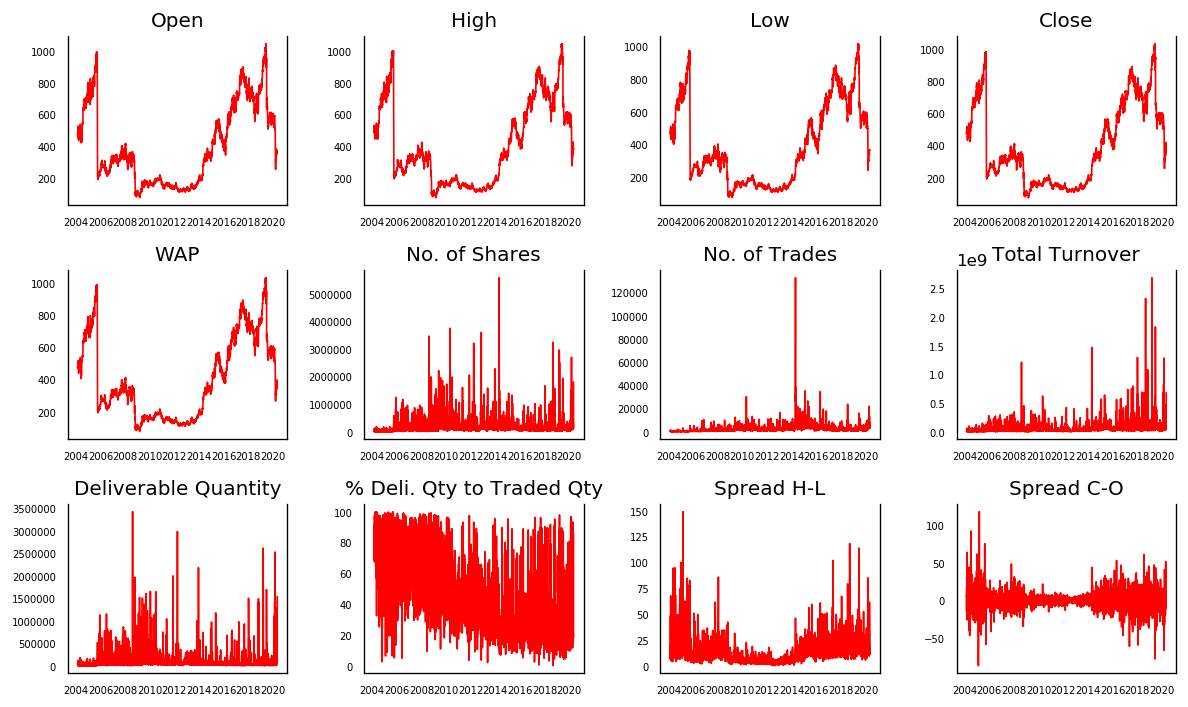

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=4, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [54]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(temp, variables = temp.columns)   

,Close_x,No. of Shares_x,No. of Trades_x,% Deli. Qty to Traded Qty_x
Close_y,1.0000,0.0109,0.6367,0.2851
No. of Shares_y,0.0000,1.0000,0.0000,0.0000
No. of Trades_y,0.0126,0.0006,1.0000,0.0000
% Deli. Qty to Traded Qty_y,0.0136,0.0000,0.0000,1.0000


In [53]:
temp =df[['Close','No. of Shares','No. of Trades','% Deli. Qty to Traded Qty']]

In [69]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(temp)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Close  ::  474.83    > 40.1749   =>   True
No. of Shares ::  163.27    > 24.2761   =>   True
No. of Trades ::  30.32     > 12.3212   =>   True
% Deli. Qty to Traded Qty ::  1.53      > 4.1296    =>   False


In [72]:
nobs = 4
df_train, df_test = temp[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(4008, 4)
(4, 12)


tran.shape

In [57]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


In [73]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [78]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Close" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1071
 No. Lags Chosen       = 3
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.2417. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "No. of Shares" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.8543
 No. Lags Chosen       = 23
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "No. of Trades" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. N

In [75]:
df_differenced = df_train.diff().dropna()

In [77]:
df_differenced = df_differenced.diff().dropna()

In [79]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  54.93202697106666
BIC :  54.96346416886692
FPE :  7.189127659015405e+23
HQIC:  54.943169931884306 

Lag Order = 2
AIC :  53.98922363584538
BIC :  54.04582247926587
FPE :  2.8004119385382924e+23
HQIC:  54.009285433307014 

Lag Order = 3
AIC :  53.446659360428015
BIC :  53.52843042379739
FPE :  1.6277558920859308e+23
HQIC:  53.475643969085766 

Lag Order = 4
AIC :  53.155926835024374
BIC :  53.262880699849404
FPE :  1.2170986863441978e+23
HQIC:  53.1938382322075 

Lag Order = 5
AIC :  52.87884258366282
BIC :  53.010989838635076
FPE :  9.225495704480218e+22
HQIC:  52.925684749480354 

Lag Order = 6
AIC :  52.68024243431167
BIC :  52.837593675314224
FPE :  7.563779805357498e+22
HQIC:  52.736019351655074 

Lag Order = 7
AIC :  52.533557578858215
BIC :  52.7161234089723
FPE :  6.531826087057217e+22
HQIC:  52.598273233403994 

Lag Order = 8
AIC :  52.425877558099394
BIC :  52.63366858761114
FPE :  5.865026567393259e+22
HQIC:  52.499535938311745 

Lag Order = 9
AIC :  52.3

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [81]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,56.58,56.59,3.736e+24,56.58
1,54.94,54.97,7.246e+23,54.95
2,54.00,54.05,2.821e+23,54.02
3,53.45,53.53,1.637e+23,53.48
4,53.16,53.27,1.224e+23,53.20
5,52.88,53.02,9.277e+22,52.93
6,52.68,52.84,7.598e+22,52.74
7,52.54,52.72,6.556e+22,52.60
8,52.43,52.64,5.881e+22,52.50
9,52.34,52.57,5.362e+22,52.42


In [82]:
model_fitted = model.fit(4)
model_fitted.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 14, May, 2020
Time:                     13:38:52
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    53.2629
Nobs:                     4002.00    HQIC:                   53.1938
Log likelihood:          -129011.    FPE:                1.21710e+23
AIC:                      53.1559    Det(Omega_mle):     1.19664e+23
--------------------------------------------------------------------
Results for equation Close
                                  coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------
const                               -0.006932         0.282012           -0.025           0.980
L1.Close                            -0.820925         0.015558          -52.765           0.000


In [96]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col ,':', round(val, 2))

Open : 2.06
High : 2.17
Low : 2.13
Close : 2.17


In [97]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

4


array([[-1.260000e+01, -2.392163e+06,  2.183000e+03, -1.341000e+02],
       [-7.700000e+00,  9.759520e+05, -7.482000e+03,  8.230000e+01],
       [ 2.620000e+01,  1.448260e+05,  3.784000e+03, -2.340000e+01],
       [-2.800000e+00,  1.644360e+05,  3.765000e+03,  1.008000e+01]])

In [108]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc,  columns=temp.columns + '_2d')
df_forecast

,Close_2d,No. of Shares_2d,No. of Trades_2d,% Deli. Qty to Traded Qty_2d
0,-9.823512,-401928.260293,-3797.739126,-9.353023
1,-0.328379,-81115.693683,9.211481,-7.101664
2,3.364564,399215.819394,572.952305,19.398135
3,2.555242,-168851.058453,650.244421,-12.223496


In [111]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [112]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        

In [113]:
df_results

,Close_2d,No. of Shares_2d,No. of Trades_2d,% Deli. Qty to Traded Qty_2d,Close_1d,Close_forecast,No. of Shares_1d,No. of Shares_forecast,No. of Trades_1d,No. of Trades_forecast,% Deli. Qty to Traded Qty_1d,% Deli. Qty to Traded Qty_forecast
0,-9.823512,-401928.260293,-3797.739126,-9.353023,1.026488,361.526488,-230974.260293,67134.739707,-266.739126,6819.260874,-11.753023,5.966977
1,-0.328379,-81115.693683,9.211481,-7.101664,0.698109,362.224597,-312089.953976,-244955.214269,-257.527645,6561.733229,-18.854687,-12.887710
2,3.364564,399215.819394,572.952305,19.398135,4.062673,366.287271,87125.865418,-157829.348851,315.424660,6877.157889,0.543448,-12.344263
3,2.555242,-168851.058453,650.244421,-12.223496,6.617915,372.905186,-81725.193035,-239554.541886,965.669081,7842.826970,-11.680048,-24.024311


In [122]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: Close')
accuracy_prod = forecast_accuracy(df_results['Close_forecast'].values, df_test['Close'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('Forecast Accuracy of: No. of Shares')
accuracy_prod = forecast_accuracy(df_results['No. of Shares_forecast'].values, df_test['No. of Shares'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('Forecast Accuracy of:No. of Trades')
accuracy_prod = forecast_accuracy(df_results['No. of Trades_forecast'].values, df_test['No. of Trades'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('Forecast Accuracy of: % Deli. Qty to Traded Qty')
accuracy_prod = forecast_accuracy(df_results['% Deli. Qty to Traded Qty_forecast'].values, df_test['% Deli. Qty to Traded Qty'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))



Forecast Accuracy of: Close
mape :  0.0374
me :  -14.9141
mae :  15.5524
mpe :  -0.0357
rmse :  28.8193
corr :  -0.2451
minmax :  0.0374
Forecast Accuracy of: No. of Shares
mape :  1.2723
me :  -780395.5913
mae :  780395.5913
mpe :  -1.2723
rmse :  1099363.7481
corr :  -0.6021
minmax :  1.2723
Forecast Accuracy of:No. of Trades
mape :  0.8386
me :  531.9947
mae :  3870.6281
mpe :  0.5864
rmse :  4374.386
corr :  -0.1822
minmax :  0.4433
Forecast Accuracy of: % Deli. Qty to Traded Qty
mape :  1.3268
me :  -49.7723
mae :  49.7723
mpe :  -1.3268
rmse :  60.7139
corr :  -0.6138
minmax :  1.3268


In [123]:
df_results.columns
df= temp

In [129]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000172FE1AF4C8> (for post_execute):


ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

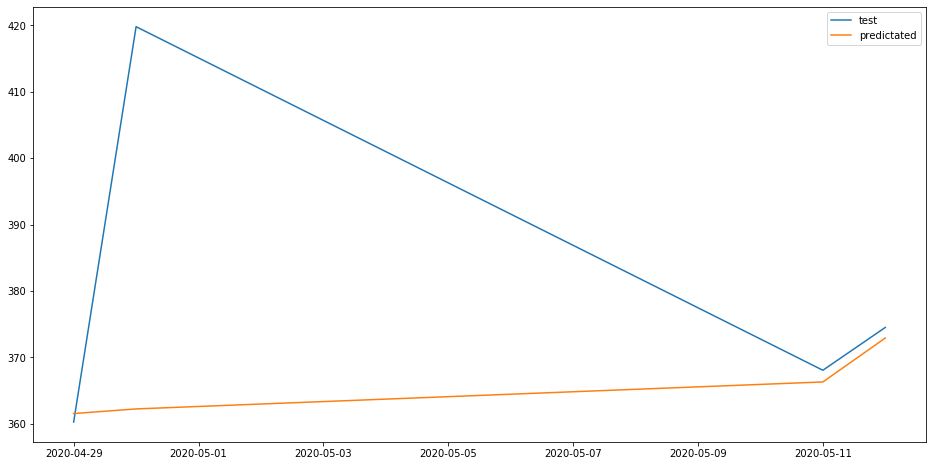

In [149]:
 plt.figure(figsize=(16,8))
plt.plot(df_test['Close'], label='test')
plt.plot(df_results['Close_forecast'], label='predictated')
plt.legend(loc='best')
plt.show()

In [135]:
len(df_results)

4

In [143]:
df_results['Date']=df_test.index

In [145]:
df_results= df_results.set_index('Date')

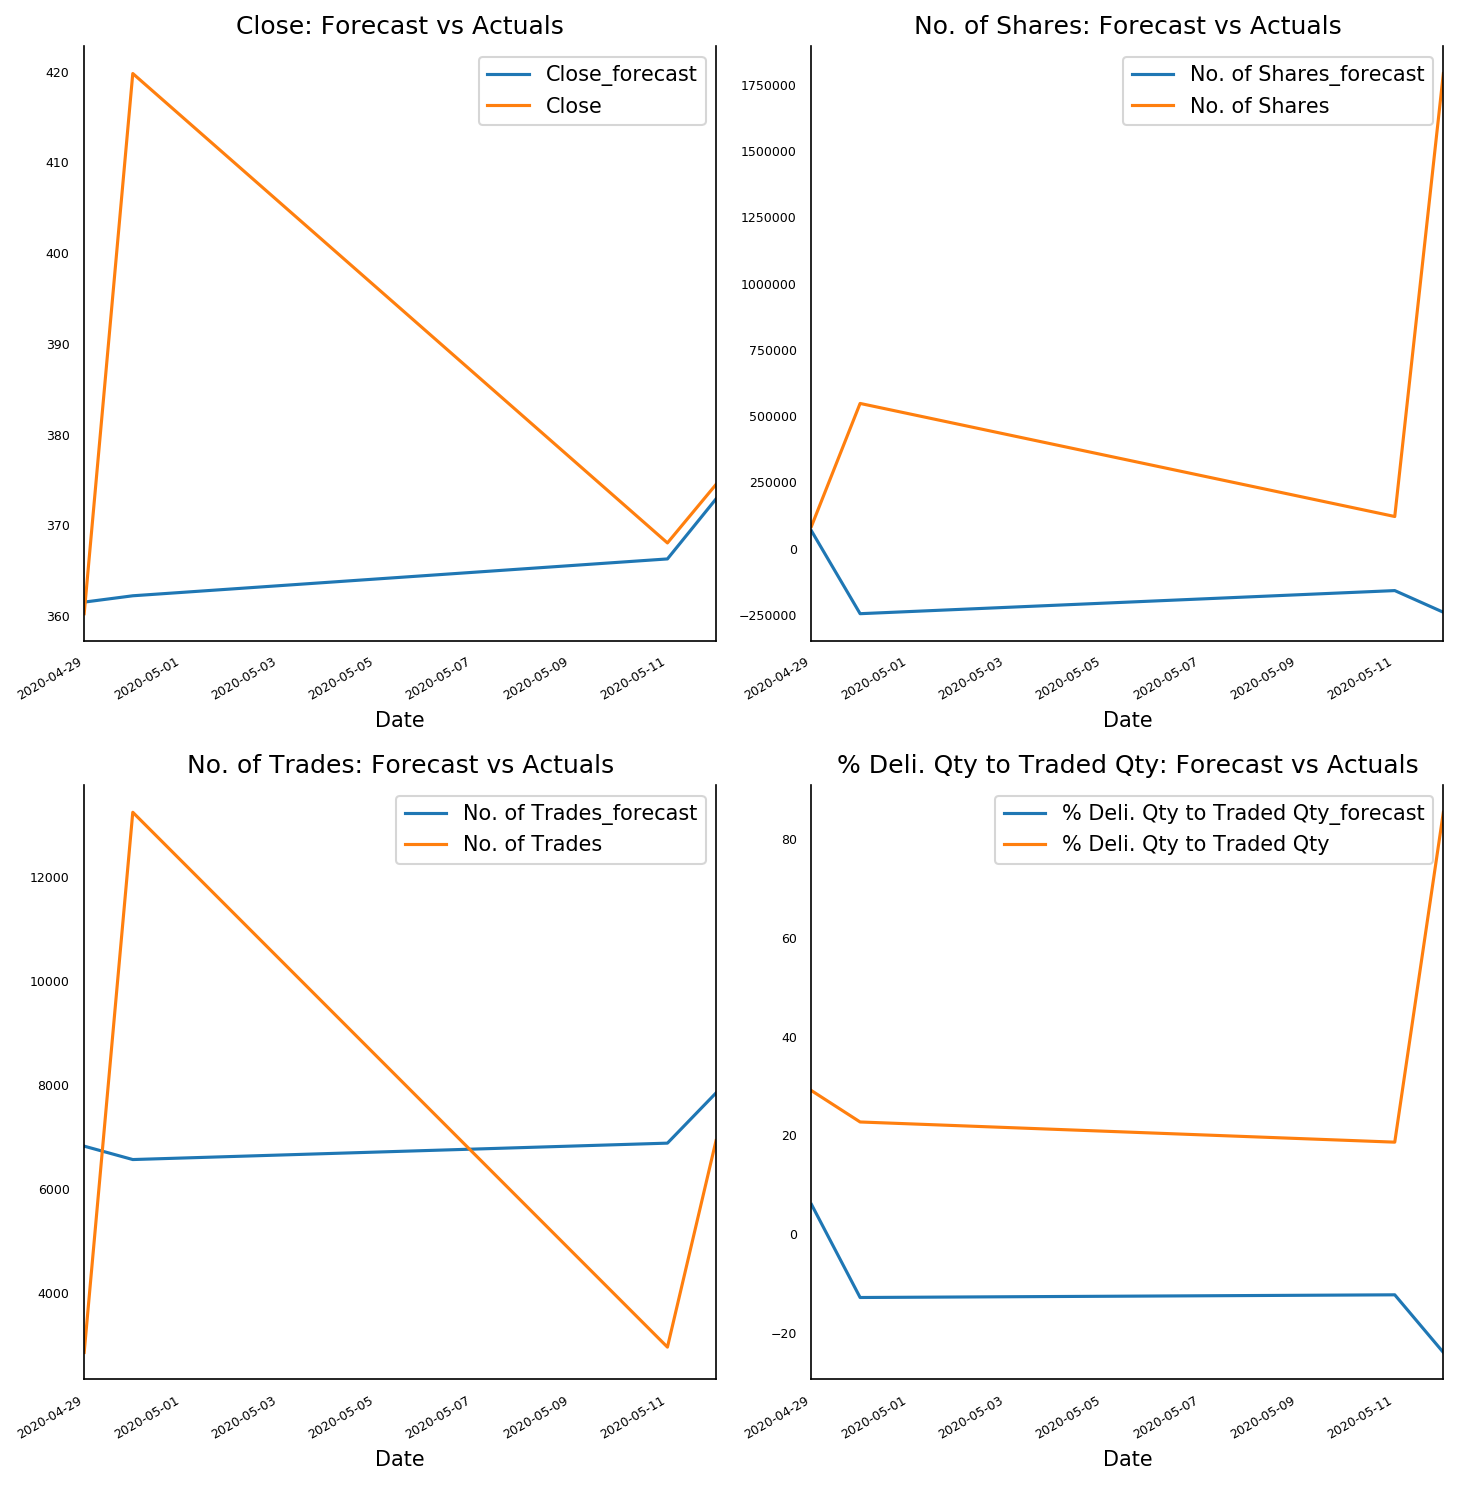

In [150]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    

plt.tight_layout();

In [154]:

# VARMA example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency

model = VARMAX(df_train, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast()
print(yhat)


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


KeyboardInterrupt: 

In [152]:
temp =df_train['Close']

In [153]:
temp

Date
2004-02-24    485.05
2004-02-25    470.45
2004-02-26    476.90
2004-02-27    480.15
2004-03-01    480.20
               ...  
2020-04-22    353.40
2020-04-23    348.55
2020-04-24    336.00
2020-04-27    349.65
2020-04-28    360.50
Name: Close, Length: 4008, dtype: float64

In [155]:
for i in range(5):
    i += 1
    model = sm.tsa.VARMAX(df_train, order=(i,0))
    model_result = model.fit(maxiter=1000, disp=False)
    print('Order = ', i)
    print('AIC: ', model_result.aic)
    print('BIC: ', model_result.bic)
    print('HQIC: ', model_result.hqic)

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Order =  1
AIC:  253268.9435421623
BIC:  253457.82497144525
HQIC:  253335.89029498852


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Order =  2
AIC:  252810.39186926445
BIC:  253100.0100608316
HQIC:  252913.04355693134


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Order =  3
AIC:  252437.00084217868
BIC:  252827.35579603008
HQIC:  252575.3574646862


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Order =  4
AIC:  252222.2264940949
BIC:  252713.31821023056
HQIC:  252396.28805144312


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


LinAlgError: Singular forecast error covariance matrix encountered at period 0

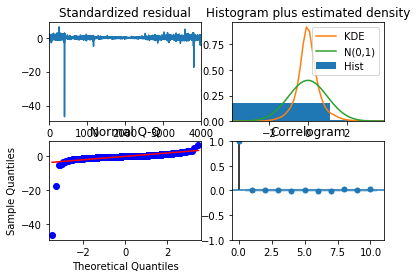

In [156]:
model_result.plot_diagnostics()
plt.show()

In [168]:
z = model_result.forecast(steps=4)

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [178]:
rmse = sqrt(mean_squared_error(df_train['Close'][-7:], z['Close']))

ValueError: Found input variables with inconsistent numbers of samples: [7, 4]

In [187]:
z['Close'].index=df_test['Close'].index

In [188]:
df_trainrmse = sqrt(mean_squared_error(df_test['Close'][-4:], z['Close'][-4:]))
df_trainrmse 

30.618977226790157

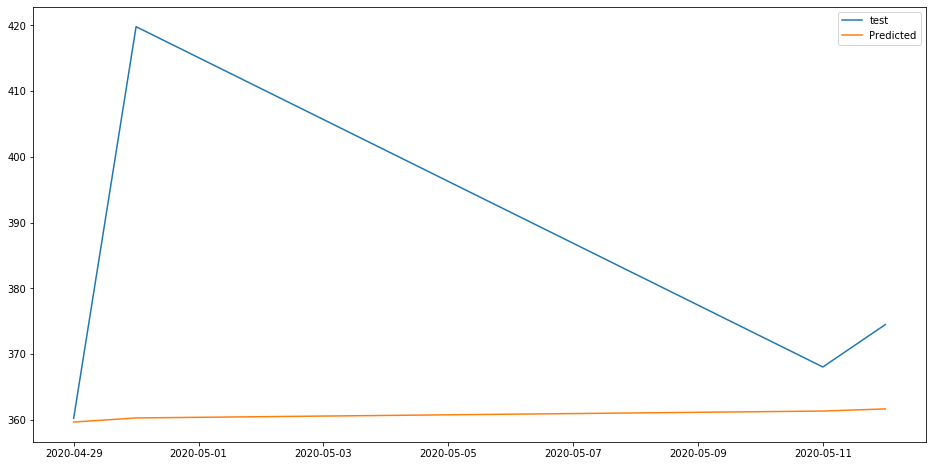

In [191]:
plt.figure(figsize=(16,8))
plt.plot(df_test['Close'], label='test')
plt.plot(z['Close'], label='Predicted')
plt.legend(loc='best')
plt.show()

In [186]:
z['Close']

Date
2020-04-23    359.678289
2020-04-24    360.299530
2020-04-27    361.347482
2020-04-28    361.673055
Name: Close, dtype: float64

In [185]:
df_test['Close']

Date
2020-04-29    360.25
2020-04-30    419.80
2020-05-11    368.05
2020-05-12    374.50
Name: Close, dtype: float64

In [192]:
plt.figure(figsize=(16,8))
plt.plot(y_hat_avg['Open'], label='Train')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

NameError: name 'y_hat_avg' is not defined

<Figure size 1152x576 with 0 Axes>

In [195]:
df.to_csv('Temp.csv')

In [196]:
trainPredict

NameError: name 'trainPredict' is not defined

In [198]:
temp=temp.to_csv('Close.csv')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
temp